In [18]:
import csv
import pandas as pd
import numpy as np
import glob
import matplotlib
import scipy as sp
from matplotlib import pyplot as plt
from itertools import cycle, islice

In [7]:
def organize_trial_by_trial(txt_filename):
    reader = csv.reader( open(txt_filename))
    game_data = [row for row in reader]
    df = pd.DataFrame(np.array(game_data))
    df = df.T
    df = df.rename(columns = {0:"game number", 1:"trial", 2:"player", 3:"arm", 4:"probability", 5:"reward", 6:"time", 7:"P1 score", 8:"P2 score"})
    #df = df.drop(columns = 'time') #can comment this out if want to look at time
    df = df.apply(pd.to_numeric)
    df.head()
    
    #combining info in the same trial for both players together in the same row
    #player1 = df[df['player'] == 1].drop(columns = "P2 score").drop(columns = "player")
    #player1 = player1.reset_index().drop(columns = "index")
    #player1 = player1.rename(columns = {"arm":"P1 arm", "probability":"P1 prob", "reward":"P1 reward"})

    #player2 = df[df['player'] == 2].drop(columns = "P1 score").drop(columns = 'trial').drop(columns = 'player')
    #player2 = player2.reset_index().drop(columns = "index")
    #player2 = player2.rename(columns = {"arm":"P2 arm", "probability":"P2 prob", "reward":"P2 reward"})

    #result = pd.concat([player1, player2], axis=1, sort=False)
    return df

#TODO: function that pairs up P2(trial n) and P1(trial n+1)

def combine_all_files(path):
    all_files = glob.glob(path + "/*.txt")
    df = pd.DataFrame()
    
    for filename in all_files:
        new_df = organize_trial_by_trial(filename)
        df = pd.concat([df, new_df], axis=0, ignore_index=True)
    return df

In [8]:
def get_score(df, player_number, game_number):
    if game_number == 1:
        row = 199
    elif game_number == 2:
        row = 399
    if player_number == 1:
        column = 'P1 score'
    elif player_number == 2:
        column = 'P2 score'
    score = df.loc[row, column]
    return score

In [9]:
#create a dataframes for scores
scores = pd.DataFrame(columns=['s_g1','s_g2','j_g1','j_g2'])

In [10]:
#version is 's' for single player and 'j' for joint
def call_get_score(df, version):
    p1_g1 = get_score(df, 1, 1)
    p1_g2 = get_score(df, 1, 2)
    p1_score_diff = p1_g2 - p1_g1
    if version == 'j':
        p2_g1 = get_score(df, 2, 1)
        p2_g2 = get_score(df, 2, 2)
        p2_score_diff = p2_g2 - p2_g1
        return p1_g1, p1_g2, p2_g1, p2_g2, p1_score_diff, p2_score_diff
    return p1_g1, p1_g2, p1_score_diff

In [11]:
#separate data frames for p1 and p2 
def separate_df(df, version):
    #df.set_index(df['trial'])
    df_p1 = df[df['player'] == 1]
    df_p1_g1 = df_p1[df['game number'] == 1]
    df_p1_g2 = df_p1[df['game number'] == 2]
    if version == 's':
        return df_p1_g1, df_p1_g2
    df_p2 = df[df['player'] ==2 ]
    df_p2_g1 = df_p2[df['game number'] == 1]
    df_p2_g2 = df_p2[df['game number'] == 2]
    return df_p1_g1, df_p1_g2, df_p2_g1, df_p2_g2

In [12]:
#needs work
def call_call_get_score(df, version):
    p1_g1 = df+'_'+'p1_'+'g1_'+'score'
    p1_g2 = df+'_'+'p1_'+'g2_'+'score'
    p2_g1 = df+'_'+'p2_'+'g1_'+'score'
    p2_g2 = df+'_'+'p2_'+'g2_'+'score'
    p1_g1, p1_g2, p2_g1, p2_g2 = call_get_score(df, version)
    return p1_g1, p1_g2, p2_g1, p2_g2

In [13]:
sess = ['s01','s02','s03','s04','s05','s06','s07','s08','s09','j01','j02','j03','j04','j05','j06','j07','j08']

In [ ]:
i = 0
while i < len(sess):
    load_file(sess[0])

In [22]:
def load_file(sess):
    file = 'data/'+sess+'_gamedata.csv'
    df = organize_trial_by_trial(file)
    sess_df = df
    arg1 = 'p1_g1_score_'.format(sess)
    #arg2 = 'sess'+'_p1_g2_score'
    #arg3 = 'sess'+'_score_diff'
    #arg1,arg2,arg3 = call_get_score(sess_df,sess[:1])
    arg1 = call_get_score(sess_df,sess[:1])

In [89]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s01_gamedata.csv')
s01 = df
s01_p1_g1_score,s01_p1_g2_score,s01_score_diff = call_get_score(s01, 's')
s01.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,2,30,1,11.220698,1,0
1,1,1,2,1,90,1,2.742137,1,1
2,1,2,1,3,60,1,5.362458,2,1
3,1,2,2,1,90,1,3.699948,2,2
4,1,3,1,2,30,0,3.489552,2,2


In [88]:
#in the s files, p2 is the confederate
#NO SECOND GAME
df = organize_trial_by_trial('data/s02_gamedata.csv')
s02 = df
s02_p1_g1_score = get_score(s02, 1, 1)
s02.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,1,30,0,12.598357,0,0
1,1,1,2,1,90,1,2.182159,0,1
2,1,2,1,2,60,1,3.600245,1,1
3,1,2,2,1,90,1,2.628291,1,2
4,1,3,1,2,60,1,3.252174,2,2


In [90]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s03_gamedata.csv')
s03 = df
s03_p1_g1_score,s03_p1_g2_score,s03_score_diff = call_get_score(s03, 's')
s03.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,3,30,0,31.921890,0,0
1,1,1,2,1,90,1,4.758381,0,1
2,1,2,1,2,60,1,3.219123,1,1
3,1,2,2,1,90,1,3.491894,1,2
4,1,3,1,1,90,1,2.521189,2,2


In [91]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s05_gamedata.csv')
s05 = df
s05_p1_g1_score,s05_p1_g2_score,s05_score_diff = call_get_score(s05, 's')
s05.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,2,30,1,7.627847,1,0
1,1,1,2,1,90,1,3.360008,1,1
2,1,2,1,3,90,1,5.575300,2,1
3,1,2,2,1,90,1,5.711864,2,2
4,1,3,1,3,90,1,3.985995,3,2


In [92]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s06_gamedata.csv')
s06 = df
s06_p1_g1_score,s06_p1_g2_score,s06_score_diff = call_get_score(s06, 's')
s06.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,3,90,1,3.134130,1,0
1,1,1,2,1,90,1,9.395702,1,1
2,1,2,1,2,60,0,2.179541,1,1
3,1,2,2,1,90,1,2.545001,1,2
4,1,3,1,3,90,1,2.511049,2,2


In [93]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s07_gamedata.csv')
s07 = df
s07_p1_g1_score,s07_p1_g2_score,s07_score_diff = call_get_score(s07, 's')
s07.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,3,60,0,13.140095,0,0
1,1,1,2,1,90,1,2.417684,0,1
2,1,2,1,3,60,1,1.725920,1,1
3,1,2,2,1,90,1,2.810070,1,2
4,1,3,1,1,90,0,1.551831,1,2


In [94]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s08_gamedata.csv')
s08 = df
s08_p1_g1_score,s08_p1_g2_score,s08_score_diff = call_get_score(s08, 's')
s08.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,1,30,0,13.150472,0,0
1,1,1,2,1,90,1,2.550160,0,1
2,1,2,1,2,90,1,6.812722,1,1
3,1,2,2,1,90,1,3.497989,1,2
4,1,3,1,2,90,1,2.441523,2,2


In [95]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s09_gamedata.csv')
s09 = df
s09_p1_g1_score,s09_p1_g2_score,s09_score_diff = call_get_score(s09, 's')
s09.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,3,60,1,14.642494,1,0
1,1,1,2,1,90,1,2.997907,1,1
2,1,2,1,3,60,1,7.654677,2,1
3,1,2,2,1,90,0,2.905190,2,1
4,1,3,1,1,90,1,3.873310,3,1


In [113]:
score_diff = pd.DataFrame({'participant':['s01', 's03', 's05', 
                               's06', 's07', 's08', 's09'], 'score_diff':
     [s01_score_diff, s03_score_diff, s05_score_diff, s06_score_diff,
      s07_score_diff, s08_score_diff, s09_score_diff]})

In [114]:
score_diff

,participant,score_diff
0,s01,14
1,s03,8
2,s05,11
3,s06,5
4,s07,5
5,s08,-10
6,s09,5


In [117]:
#increase in every participant except 1
#df excluding outliar
score_diff_ex = pd.DataFrame({'participant':['s01', 's03', 's05', 
                               's06', 's07', 's09'], 'score_diff':
     [s01_score_diff, s03_score_diff, s05_score_diff, s06_score_diff,
      s07_score_diff, s09_score_diff]})

In [118]:
score_diff_ex

,participant,score_diff
0,s01,14
1,s03,8
2,s05,11
3,s06,5
4,s07,5
5,s09,5


In [115]:
score_diff_mean = score_diff['score_diff'].mean()

In [119]:
score_diff_ex_mean = score_diff_ex['score_diff'].mean()

In [116]:
score_diff_mean

5.428571428571429

In [120]:
score_diff_ex_mean

8.0

In [96]:
s_scores_1 = pd.DataFrame({'participant':['s01', 's02', 's03', 's05', 
                               's06', 's07', 's08', 's09'], 'score':
     [s01_p1_g1_score, s02_p1_g1_score, s03_p1_g1_score, s05_p1_g1_score,
      s06_p1_g1_score, s07_p1_g1_score, s08_p1_g1_score, s09_p1_g1_score]})
s_scores_1.set_index('participant', inplace=True, drop=True)
s_scores_2 = pd.DataFrame({'participant':['s01', 's03', 's05', 
                               's06', 's07', 's08', 's09'], 'score':
    [s01_p1_g2_score, s03_p1_g2_score, s05_p1_g2_score, 
    s06_p1_g2_score, s07_p1_g2_score, s08_p1_g2_score, s09_p1_g2_score]})
s_scores_2.set_index('participant', inplace=True, drop=True)
#s_scores_1 = pd.DataFrame(data = d1)
#s_scores_2 = pd.DataFrame(data = d2)
s_scores_1

,score
participant,
s01,60
s02,63
s03,63
s05,77
s06,82
s07,63
s08,90
s09,65


In [97]:
s_scores_2

,score
participant,
s01,74
s03,71
s05,88
s06,87
s07,68
s08,80
s09,70


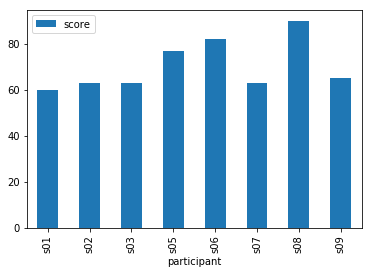

In [98]:
s_scores_1_bar = s_scores_1.plot.bar()

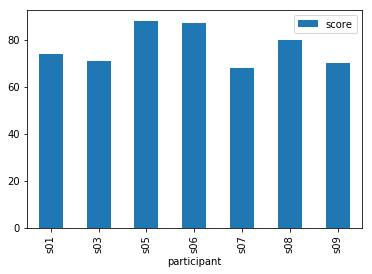

In [99]:
s_scores_2_bar = s_scores_2.plot.bar()

In [20]:
#combine g1 and g2 to one dataframe
s_combo = s_scores_1.append(s_scores_2)

In [21]:
'''s_combo = pd.DataFrame({'participant':['s01', 's01', 's02', 's03', 's03','s05', 's05'
                               's06', 's06','s07','s07','s08','s08','s09','s09'], 'score':
     [s01_p1_g1_score, s01_p1_g2_score, s02_p1_g1_score, s03_p1_g1_score, s03_p1_g2_score, s05_p1_g1_score,
      s05_p1_g2_score,s06_p1_g1_score,s06_p1_g2_score, s07_p1_g1_score,s07_p1_g2_score, s08_p1_g1_score,s08_p1_g2_score,
      s09_p1_g1_score, s09_p1_g2_score]})
s_combo.set_index('participant', inplace=True, drop=True)'''

"s_combo = pd.DataFrame({'participant':['s01', 's01', 's02', 's03', 's03','s05', 's05'\n                               's06', 's06','s07','s07','s08','s08','s09','s09'], 'score':\n     [s01_p1_g1_score, s01_p1_g2_score, s02_p1_g1_score, s03_p1_g1_score, s03_p1_g2_score, s05_p1_g1_score,\n      s05_p1_g2_score,s06_p1_g1_score,s06_p1_g2_score, s07_p1_g1_score,s07_p1_g2_score, s08_p1_g1_score,s08_p1_g2_score,\n      s09_p1_g1_score, s09_p1_g2_score]})\ns_combo.set_index('participant', inplace=True, drop=True)"

In [22]:

#new_index = ('s01_g1','s01_g2','s02_g1','s03_g1','s03_g2','s05_g1','s05_g2', 
                               #'s06_g1','s06_g2','s07_g1','s07_g2','s08_g1','s08_g2','s09_g1','s09_g2')
#s_combo.index = new_index

In [23]:
s_combo

,score
participant,
s01,60
s02,63
s03,63
s05,77
s06,82
s07,63
s08,90
s09,65
s01,74


In [73]:
s_combo = s_combo.sort_values(by=['participant'])

In [74]:
s_combo

,score
participant,
s01,60
s01,74
s02,63
s03,63
s03,71
s05,77
s05,88
s06,82
s06,87


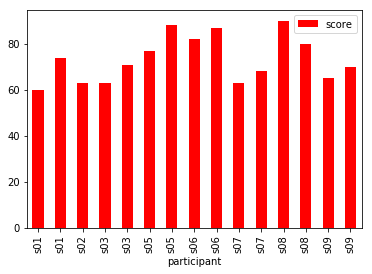

In [75]:
#need to make g1 and g2 bars diff colors
colors = list(islice(cycle(['red','blue','red','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue']),None,len(s_combo)))
#my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
s_combo_bar = s_combo.plot(kind='bar',color=colors)

In [201]:
s_scores_1_mean = s_scores_1.mean()

In [210]:
s_scores_1_std = s_scores_1.std()

In [202]:
s_scores_2_mean = s_scores_2.mean()

In [203]:
s_scores_2_std = s_scores_1.std()

In [204]:
s_scores_2_std = s_scores_2.std()

In [27]:
#does everyone do better in the second game? 
#does the player that did better in the first game always do better in the second game?

In [28]:
#j_g1_scores = pd.DataFrame([j02_p1_g1_score, j02_p2_g1_score, j01_p1_g1_score, j01_p2_g1_score, j03_p1_g1_score, j03_p2_g1],index = ['j02_p1_g1_score', 'j02_p2_g1_score', 'jo1_p1_g1_score', 'j01_p2_g1_score', 'j03_p1_g1', 'j03_p2_g1'], columns=['score'])

In [29]:
s_list = [s01,s02,s03,s05,s06,s07,s08,s09]

In [30]:
s01_p1_g1, s01_p1_g2 = separate_df(s01, 's')
s02_p1_g1, s02_p1_g2 = separate_df(s02, 's')
s03_p1_g1, s03_p1_g2 = separate_df(s03, 's')
s05_p1_g1, s05_p1_g2 = separate_df(s05, 's')
s06_p1_g1, s06_p1_g2 = separate_df(s06, 's')
s07_p1_g1, s07_p1_g2 = separate_df(s07, 's')
s08_p1_g1, s08_p1_g2 = separate_df(s08, 's')
s09_p1_g1, s09_p1_g2 = separate_df(s09, 's')

/Users/baryosef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/baryosef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [292]:
s01_p1_g1_count = s01_p1_g1['probability'].value_counts(sort=False)
s01_p1_g2_count = s01_p1_g2['probability'].value_counts(sort=False)
s02_p1_g1_count = s02_p1_g1['probability'].value_counts(sort=False) #no second game
s03_p1_g1_count = s03_p1_g1['probability'].value_counts(sort=False)
s03_p1_g2_count = s03_p1_g2['probability'].value_counts(sort=False)
s05_p1_g1_count = s05_p1_g1['probability'].value_counts(sort=False)
s05_p1_g2_count = s05_p1_g2['probability'].value_counts(sort=False)
s06_p1_g1_count = s06_p1_g1['probability'].value_counts(sort=False)
s06_p1_g2_count = s06_p1_g2['probability'].value_counts(sort=False)
s07_p1_g1_count = s07_p1_g1['probability'].value_counts(sort=False)
s07_p1_g2_count = s07_p1_g2['probability'].value_counts(sort=False)
s08_p1_g1_count = s08_p1_g1['probability'].value_counts(sort=False)
s08_p1_g2_count = s08_p1_g2['probability'].value_counts(sort=False)
s09_p1_g1_count = s09_p1_g1['probability'].value_counts(sort=False)
s09_p1_g2_count = s09_p1_g2['probability'].value_counts(sort=False)

In [293]:
s01_p1_g1_count

30    38
60    43
90    19
Name: probability, dtype: int64

In [294]:
s02_p1_g1_count

30    23
60    27
90    50
Name: probability, dtype: int64

In [295]:
s03_p1_g1_count

30    28
60    38
90    34
Name: probability, dtype: int64

In [296]:
s05_p1_g1_count

30    11
60    35
90    54
Name: probability, dtype: int64

In [297]:
s06_p1_g1_count

30    11
60    13
90    76
Name: probability, dtype: int64

In [37]:
s07_p1_g1_count

90    46
60    29
30    25
Name: probability, dtype: int64

In [38]:
s08_p1_g1_count

90    92
60     6
30     2
Name: probability, dtype: int64

In [39]:
s09_p1_g1_count

90    45
60    38
30    17
Name: probability, dtype: int64

In [40]:
s_g1_counts = pd.DataFrame([s01_p1_g1_count, s02_p1_g1_count, s03_p1_g1_count, 
                            s05_p1_g1_count, s06_p1_g1_count, s07_p1_g1_count, s08_p1_g1_count, s09_p1_g1_count],
                          index=['s01_p1_g1_count', 's02_p1_g1_count', 's03_p1_g1_count', 
                            's05_p1_g1_count', 's06_p1_g1_count', 's07_p1_g1_count', 's08_p1_g1_count', 's09_p1_g1_count'])

In [41]:
s_g1_counts

,30,60,90
s01_p1_g1_count,38,43,19
s02_p1_g1_count,23,27,50
s03_p1_g1_count,28,38,34
s05_p1_g1_count,11,35,54
s06_p1_g1_count,11,13,76
s07_p1_g1_count,25,29,46
s08_p1_g1_count,2,6,92
s09_p1_g1_count,17,38,45


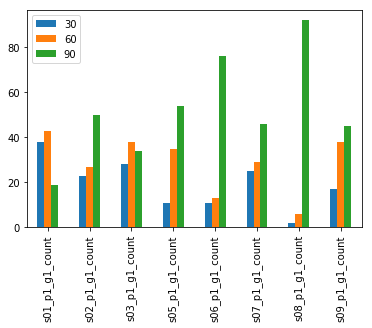

In [42]:
s_g1_counts_bar = s_g1_counts.plot.bar()

In [184]:
s_g1_low = np.mean(s_g1_counts.iloc[:,0])

In [185]:
s_g1_med = np.mean(s_g1_counts.iloc[:,1])

In [186]:
s_g1_high = np.mean(s_g1_counts.iloc[:,2])

In [187]:
s_g1_low

19.375

In [188]:
s_g1_med

28.625

In [189]:
s_g1_high

52.0

In [49]:
s_g2_counts = pd.DataFrame([s01_p1_g2_count, s03_p1_g2_count, 
                            s05_p1_g2_count, s06_p1_g2_count, s07_p1_g2_count, s08_p1_g2_count, s09_p1_g2_count],
                          index=['s01_p1_g2_count', 's03_p1_g2_count', 
                            's05_p1_g2_count', 's06_p1_g2_count', 's07_p1_g2_count', 's08_p1_g2_count', 's09_p1_g2_count'])

In [190]:
s_g2_counts

,30,60,90
s01_p1_g2_count,38.0,16.0,46.0
s03_p1_g2_count,27.0,29.0,44.0
s05_p1_g2_count,11.0,NaN,89.0
s06_p1_g2_count,7.0,7.0,86.0
s07_p1_g2_count,18.0,32.0,50.0
s08_p1_g2_count,9.0,15.0,76.0
s09_p1_g2_count,14.0,37.0,49.0


In [ ]:
#maximizing and matching?

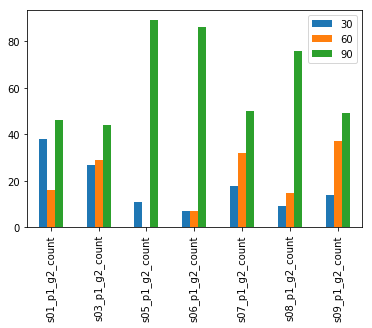

In [51]:
s_g2_counts_bar = s_g2_counts.plot.bar()

In [180]:
s_g2_low = np.mean(s_g2_counts.iloc[:,0])
s_g2_med = np.mean(s_g2_counts.iloc[:,1])
s_g2_high = np.mean(s_g2_counts.iloc[:,2])

In [181]:
s_g2_low

17.714285714285715

In [182]:
s_g2_med

22.666666666666668

In [183]:
s_g2_high

62.857142857142854

In [130]:
df = organize_trial_by_trial('data/j01_gamedata.csv')
j01 = df
j01_p1_g1_score,j01_p1_g2_score,j01_p2_g1_score,j01_p2_g2_score,j01_p1_diff,j01_p2_diff = call_get_score(j01, 'j')
j01.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,3,60,1,5.121547,1,0
1,1,1,2,3,60,1,10.059181,1,1
2,1,2,1,1,90,1,5.572331,2,1
3,1,2,2,2,90,1,9.317537,2,2
4,1,3,1,2,30,0,172.400421,2,2


In [131]:
df = organize_trial_by_trial('data/j02_gamedata.csv')
j02 = df
j02_p1_g1_score,j02_p1_g2_score,j02_p2_g1_score,j02_p2_g2_score,j02_p1_diff,j02_p2_diff = call_get_score(j02, 'j')
j02.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,3,30,0,8.298026,0,0
1,1,1,2,1,60,1,3.542303,0,1
2,1,2,1,2,90,1,3.194470,1,1
3,1,2,2,3,90,1,3.182476,1,2
4,1,3,1,2,90,1,2.676718,2,2


In [132]:
df = organize_trial_by_trial('data/j03_gamedata.csv')
j03 = df
j03_p1_g1_score,j03_p1_g2_score,j03_p2_g1_score,j03_p2_g2_score,j03_p1_diff,j03_p2_diff = call_get_score(j03, 'j')
j03.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,2,90,1,80.800301,1,0
1,1,1,2,2,30,0,9.031185,1,0
2,1,2,1,3,30,1,3.031548,2,0
3,1,2,2,1,60,1,4.375411,2,1
4,1,3,1,2,90,1,5.156529,3,1


In [133]:
df = organize_trial_by_trial('data/j04_gamedata.csv')
j04 = df
j04_p1_g1_score,j04_p1_g2_score,j04_p2_g1_score,j04_p2_g2_score,j04_p1_diff,j04_p2_diff = call_get_score(j04, 'j')
j04.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,2,30,0,9.824295,0,0
1,1,1,2,2,90,0,3.709223,0,0
2,1,2,1,3,60,1,3.024550,1,0
3,1,2,2,2,90,1,2.635748,1,1
4,1,3,1,2,30,0,6.731772,1,1


In [134]:
df = organize_trial_by_trial('data/j05_gamedata.csv')
j05 = df
j05_p1_g1_score,j05_p1_g2_score,j05_p2_g1_score,j05_p2_g2_score,j05_p1_diff,j05_p2_diff = call_get_score(j05, 'j')
j05.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,2,90,1,11.781368,1,0
1,1,1,2,1,90,1,4.329930,1,1
2,1,2,1,3,60,1,11.137623,2,1
3,1,2,2,2,30,0,7.020643,2,1
4,1,3,1,1,30,0,2.390858,2,1


In [135]:
df = organize_trial_by_trial('data/j06_gamedata.csv')
j06 = df
j06_p1_g1_score,j06_p1_g2_score,j06_p2_g1_score,j06_p2_g2_score,j06_p1_diff,j06_p2_diff = call_get_score(j06, 'j')
j06.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,3,30,0,15.769461,0,0
1,1,1,2,2,60,1,6.990658,0,1
2,1,2,1,1,90,1,3.539307,1,1
3,1,2,2,3,90,1,3.229456,1,2
4,1,3,1,2,60,1,2.564774,2,2


In [136]:
df = organize_trial_by_trial('data/j07_gamedata.csv')
j07 = df
j07_p1_g1_score,j07_p1_g2_score,j07_p2_g1_score,j07_p2_g2_score,j07_p1_diff,j07_p2_diff = call_get_score(j07, 'j')
j07.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,2,60,1,14.161229,1,0
1,1,1,2,3,30,0,7.531399,1,0
2,1,2,1,1,30,0,4.872670,1,0
3,1,2,2,2,60,1,3.163488,1,1
4,1,3,1,3,90,1,5.052585,2,1


In [137]:
df = organize_trial_by_trial('data/j08_gamedata.csv')
j08 = df
j08_p1_g1_score,j08_p1_g2_score,j08_p2_g1_score,j08_p2_g2_score,j08_p1_diff,j08_p2_diff = call_get_score(j08, 'j')
j08.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,3,60,1,3.760202,1,0
1,1,1,2,2,30,0,4.963627,1,0
2,1,2,1,3,60,1,2.788667,2,0
3,1,2,2,1,90,1,3.580288,2,1
4,1,3,1,3,60,1,3.108514,3,1


In [138]:
j_scores_1 = pd.DataFrame({'participant':['j01_p1_g1_score','j01_p2_g1_score','j02_p1_g1_score','j02_p2_g1_score','j03_p1_g1_score','j03_p2_g1_score','j04_p1_g1_score',
      'j04_p2_g1_score','j05_p1_g1_score','j05_p2_g1_score','j06_p1_g1_score','j06_p2_g1_score','j07_p1_g1_score','j07_p2_g1_score',
      'j08_p1_g1_score', 'j08_p2_g1_score'], 'score':
     [j01_p1_g1_score,j01_p2_g1_score,j02_p1_g1_score,j02_p2_g1_score,j03_p1_g1_score,j03_p2_g1_score,j04_p1_g1_score,
      j04_p2_g1_score,j05_p1_g1_score,j05_p2_g1_score,j06_p1_g1_score,j06_p2_g1_score,j07_p1_g1_score,j07_p2_g1_score,
      j08_p1_g1_score, j08_p2_g1_score]})
j_scores_1.set_index('participant', inplace=True, drop=True)
j_scores_2 = pd.DataFrame({'participant':['j01_p1_g2_score','j01_p2_g2_score','j02_p1_g2_score','j02_p2_g2_score','j03_p1_g2_score','j03_p2_g2_score','j04_p1_g2_score',
      'j04_p2_g2_score','j05_p1_g2_score','j05_p2_g2_score','j06_p1_g2_score','j06_p2_g2_score','j07_p1_g2_score','j07_p2_g2_score',
      'j08_p1_g2_score', 'j08_p2_g2_score'], 'score':
     [j01_p1_g2_score,j01_p2_g2_score,j02_p1_g2_score,j02_p2_g2_score,j03_p1_g2_score,j03_p2_g2_score,j04_p1_g2_score,
      j04_p2_g2_score,j05_p1_g2_score,j05_p2_g2_score,j06_p1_g2_score,j06_p2_g2_score,j07_p1_g2_score,j07_p2_g2_score,
      j08_p1_g2_score, j08_p2_g2_score]})
j_scores_2.set_index('participant', inplace=True, drop=True)
#s_scores_1 = pd.DataFrame(data = d1)
#s_scores_2 = pd.DataFrame(data = d2)
j_scores_1

,score
participant,
j01_p1_g1_score,57
j01_p2_g1_score,61
j02_p1_g1_score,54
j02_p2_g1_score,68
j03_p1_g1_score,69
j03_p2_g1_score,67
j04_p1_g1_score,64
j04_p2_g1_score,56
j05_p1_g1_score,77


In [104]:
j_scores_2

,score
participant,
j01_p1_g2_score,73
j01_p2_g2_score,60
j02_p1_g2_score,72
j02_p2_g2_score,76
j03_p1_g2_score,82
j03_p2_g2_score,75
j04_p1_g2_score,60
j04_p2_g2_score,54
j05_p1_g2_score,70


In [205]:
j_scores_1_mean = j_scores_1.mean()

In [206]:
j_scores_1_std = j_scores_1.std()

In [207]:
j_scores_2_mean = j_scores_2.mean()

In [208]:
j_scores_2_std = j_scores_2.std()

In [105]:
#combine g1 and g2 to one dataframe
j_combo = j_scores_1.append(j_scores_2)

In [106]:
j_combo

,score
participant,
j01_p1_g1_score,57
j01_p2_g1_score,61
j02_p1_g1_score,54
j02_p2_g1_score,68
j03_p1_g1_score,69
j03_p2_g1_score,67
j04_p1_g1_score,64
j04_p2_g1_score,56
j05_p1_g1_score,77


In [107]:
j_combo = j_combo.sort_values(by=['participant'])

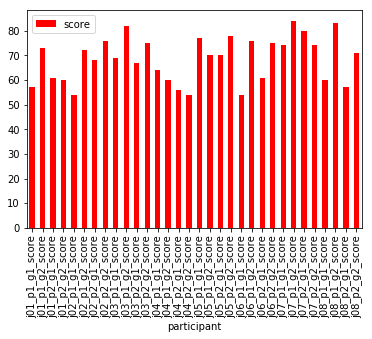

In [108]:
j_combo_bar = j_combo.plot(kind='bar',color=colors)

In [143]:
j_score_diff = pd.DataFrame({'participant':['j01_p1','j01_p2','j02_p1','j02_p2','j03_p1','j03_p2','j04_p1','j04_p2',
                                          'j05_p1','j05_p2','j06_p1','j06_p2','j07_p1','j07_p2','j06_p1','j06_p2'], 'score_diff':
     [j01_p1_diff,j01_p2_diff,j02_p1_diff,j02_p2_diff,j03_p1_diff,j03_p2_diff,j04_p1_diff,j04_p2_diff,
     j05_p1_diff,j05_p2_diff,j06_p1_diff,j06_p2_diff,j07_p1_diff,j07_p2_diff,j08_p1_diff,j08_p2_diff]})

In [144]:
j_score_diff

,participant,score_diff
0,j01_p1,16
1,j01_p2,-1
2,j02_p1,18
3,j02_p2,8
4,j03_p1,13
5,j03_p2,8
6,j04_p1,-4
7,j04_p2,-2
8,j05_p1,-7
9,j05_p2,8


In [142]:
#pattern within sessions for score_diff?
#5 ppl did worse second time; joint interfered with learning

In [145]:
j_score_diff_mean = j_score_diff['score_diff'].mean()

In [146]:
j_score_diff_mean

8.375

In [112]:
j01_p1_g1, j01_p1_g2, j01_p2_g1, j01_p2_g2 = separate_df(j01, 'j')
j02_p1_g1, j02_p1_g2, j02_p2_g1, j02_p2_g2 = separate_df(j02, 'j')
j03_p1_g1, j03_p1_g2, j03_p2_g1, j03_p2_g2 = separate_df(j03, 'j')
j04_p1_g1, j04_p1_g2, j04_p2_g1, j04_p2_g2 = separate_df(j04, 'j')
j05_p1_g1, j05_p1_g2, j05_p2_g1, j05_p2_g2 = separate_df(j05, 'j')
j06_p1_g1, j06_p1_g2, j06_p2_g1, j06_p2_g2 = separate_df(j06, 'j')
j07_p1_g1, j07_p1_g2, j07_p2_g1, j07_p2_g2 = separate_df(j07, 'j')
j08_p1_g1, j08_p1_g2, j08_p2_g1, j08_p2_g2 = separate_df(j08, 'j')

/Users/baryosef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/baryosef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/baryosef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/Users/baryosef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


In [298]:
j01_p1_g1_count = j01_p1_g1['probability'].value_counts(sort=False)
j01_p1_g2_count = j01_p1_g2['probability'].value_counts(sort=False)
j01_p2_g1_count = j01_p2_g1['probability'].value_counts(sort=False)
j01_p2_g2_count = j01_p2_g2['probability'].value_counts(sort=False)
j02_p1_g1_count = j02_p1_g1['probability'].value_counts(sort=False)
j02_p1_g2_count = j02_p1_g2['probability'].value_counts(sort=False)
j02_p2_g1_count = j02_p2_g1['probability'].value_counts(sort=False)
j02_p2_g2_count = j02_p2_g2['probability'].value_counts(sort=False)
j03_p1_g1_count = j03_p1_g1['probability'].value_counts(sort=False)
j03_p1_g2_count = j03_p1_g2['probability'].value_counts(sort=False)
j03_p2_g1_count = j03_p2_g1['probability'].value_counts(sort=False)
j03_p2_g2_count = j03_p2_g2['probability'].value_counts(sort=False)
j04_p1_g1_count = j04_p1_g1['probability'].value_counts(sort=False)
j04_p1_g2_count = j04_p1_g2['probability'].value_counts(sort=False)
j04_p2_g1_count = j04_p2_g1['probability'].value_counts(sort=False)
j04_p2_g2_count = j04_p2_g2['probability'].value_counts(sort=False)
j05_p1_g1_count = j05_p1_g1['probability'].value_counts(sort=False)
j05_p1_g2_count = j05_p1_g2['probability'].value_counts(sort=False)
j05_p2_g1_count = j05_p2_g1['probability'].value_counts(sort=False)
j05_p2_g2_count = j05_p2_g2['probability'].value_counts(sort=False)
j06_p1_g1_count = j06_p1_g1['probability'].value_counts(sort=False)
j06_p1_g2_count = j06_p1_g2['probability'].value_counts(sort=False)
j06_p2_g1_count = j06_p2_g1['probability'].value_counts(sort=False)
j06_p2_g2_count = j06_p2_g2['probability'].value_counts(sort=False)
j07_p1_g1_count = j07_p1_g1['probability'].value_counts(sort=False)
j07_p1_g2_count = j07_p1_g2['probability'].value_counts(sort=False)
j07_p2_g1_count = j06_p2_g1['probability'].value_counts(sort=False)
j07_p2_g2_count = j06_p2_g2['probability'].value_counts(sort=False)
j08_p1_g1_count = j08_p1_g1['probability'].value_counts(sort=False)
j08_p1_g2_count = j08_p1_g2['probability'].value_counts(sort=False)
j08_p2_g1_count = j08_p2_g1['probability'].value_counts(sort=False)
j08_p2_g2_count = j08_p2_g2['probability'].value_counts(sort=False)

In [299]:
j01_p1_g1_count

30    38
60    36
90    26
Name: probability, dtype: int64

In [300]:
j01_p1_g2_count

30    18
60    28
90    54
Name: probability, dtype: int64

In [301]:
j01_p2_g1_count

30    33
60    37
90    30
Name: probability, dtype: int64

In [302]:
j01_p2_g2_count

30    26
60    37
90    37
Name: probability, dtype: int64

In [303]:
j02_p1_g1_count

30    36
60    32
90    32
Name: probability, dtype: int64

In [304]:
j02_p1_g2_count

30    27
60    27
90    46
Name: probability, dtype: int64

In [305]:
j02_p2_g1_count

30    25
60    39
90    36
Name: probability, dtype: int64

In [306]:
j02_p2_g2_count

30     9
60    26
90    65
Name: probability, dtype: int64

In [307]:
j03_p1_g1_count

30    22
60    29
90    49
Name: probability, dtype: int64

In [308]:
j03_p1_g2_count

30     7
60    23
90    70
Name: probability, dtype: int64

In [309]:
j03_p2_g1_count

30    29
60    23
90    48
Name: probability, dtype: int64

In [310]:
j03_p2_g2_count

30    10
60     7
90    83
Name: probability, dtype: int64

In [311]:
j_g1_counts = pd.DataFrame([j01_p1_g1_count, j01_p2_g1_count, j02_p1_g1_count, j02_p2_g1_count, 
                            j03_p1_g1_count, j03_p1_g1_count, j03_p2_g1_count, j04_p1_g1_count, j04_p2_g1_count,
                           j05_p1_g1_count,j05_p2_g1_count, j06_p1_g1_count, j06_p2_g1_count, j07_p1_g1_count, 
                            j07_p2_g1_count, j08_p1_g1_count, j08_p2_g1_count],
                          index=['j01_p1_g1_count', 'j01_p2_g1_count', 'j02_p1_g1_count', 'j02_p2_g1_count', 
                            'j03_p1_g1_count', 'j03_p1_g1_count', 'j03_p2_g1_count', 'j04_p1_g1_count', 'j04_p2_g1_count',
                           'j05_p1_g1_count','j05_p2_g1_count', 'j06_p1_g1_count', 'j06_p2_g1_count', 'j07_p1_g1_count', 
                            'j07_p2_g1_count', 'j08_p1_g1_count', 'j08_p2_g1_count'])

In [312]:
j_g1_counts

,30,60,90
j01_p1_g1_count,38,36,26
j01_p2_g1_count,33,37,30
j02_p1_g1_count,36,32,32
j02_p2_g1_count,25,39,36
j03_p1_g1_count,22,29,49
j03_p1_g1_count,22,29,49
j03_p2_g1_count,29,23,48
j04_p1_g1_count,26,39,35
j04_p2_g1_count,34,22,44
j05_p1_g1_count,5,16,79


In [191]:
j_g1_low = np.mean(j_g1_counts.iloc[:,0])
j_g1_med = np.mean(j_g1_counts.iloc[:,1])
j_g1_high = np.mean(j_g1_counts.iloc[:,2])

In [192]:
j_g1_low

28.705882352941178

In [193]:
j_g1_med

29.176470588235293

In [194]:
j_g1_high

42.11764705882353

In [ ]:
#social matching

In [164]:
j_g2_counts = pd.DataFrame([j01_p1_g2_count, j01_p2_g2_count, j02_p1_g2_count, j02_p2_g2_count, 
                            j03_p1_g2_count, j03_p1_g2_count, j03_p2_g2_count, j04_p1_g2_count, j04_p2_g2_count,
                           j05_p1_g2_count,j05_p2_g2_count, j06_p1_g2_count, j06_p2_g2_count, j07_p1_g2_count, 
                            j07_p2_g2_count, j08_p1_g2_count, j08_p2_g2_count],
                          index=['j01_p1_g2_count', 'j01_p2_g2_count', 'j02_p1_g2_count', 'j02_p2_g2_count', 
                            'j03_p1_g2_count', 'j03_p1_g2_count', 'j03_p2_g2_count', 'j04_p1_g2_count', 'j04_p2_g2_count',
                           'j05_p1_g2_count','j05_p2_g2_count', 'j06_p1_g2_count', 'j06_p2_g2_count', 'j07_p1_g2_count', 
                            'j07_p2_g2_count', 'j08_p1_g2_count', 'j08_p2_g2_count'])

In [165]:
j_g2_counts

,30,60,90
j01_p1_g2_count,18,28,54
j01_p2_g2_count,26,37,37
j02_p1_g2_count,27,27,46
j02_p2_g2_count,9,26,65
j03_p1_g2_count,7,23,70
j03_p1_g2_count,7,23,70
j03_p2_g2_count,10,7,83
j04_p1_g2_count,42,32,26
j04_p2_g2_count,40,40,20
j05_p1_g2_count,20,15,65


In [195]:
j_g2_low = np.mean(j_g2_counts.iloc[:,0])
j_g2_med = np.mean(j_g2_counts.iloc[:,1])
j_g2_high = np.mean(j_g2_counts.iloc[:,2])

In [196]:
j_g2_low

15.764705882352942

In [197]:
j_g2_med

25.823529411764707

In [198]:
j_g2_high

58.411764705882355

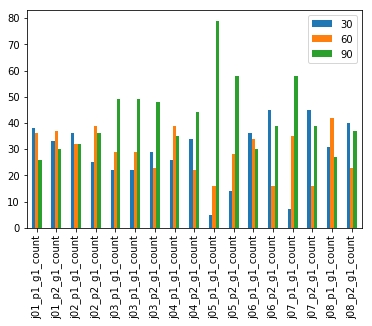

In [166]:
j_g1_counts_bar = j_g1_counts.plot.bar()

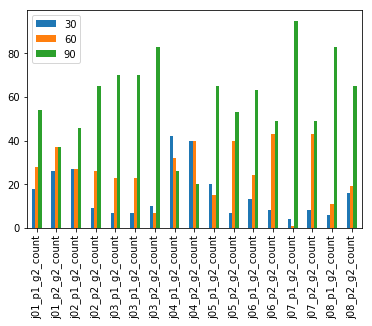

In [167]:
j_g2_counts_bar = j_g2_counts.plot.bar()

In [391]:
#NEEDS WORK
scores_df = pd.DataFrame({'score':[s_scores_1_mean, s_scores_2_mean, j_scores_1_mean, j_scores_2_mean],
                       'std':[s_scores_1_std,s_scores_2_std,j_scores_1_std,j_scores_2_std]})
scores_df.set_index['s_scores_1_mean', 's_scores_1_std', 's_scores_2_mean', 's_scores_2_std', 'j_scores_1_mean']

TypeError: 'method' object is not subscriptable

In [387]:
scores

,score,std
0,score 70.375 dtype: float64,score 11.109038 dtype: float64
1,score 76.857143 dtype: float64,score 8.214389 dtype: float64
2,score 64.3125 dtype: float64,score 8.187134 dtype: float64
3,score 72.6875 dtype: float64,score 8.42788 dtype: float64


In [227]:
def jsd(p, q, base=np.e):
    '''
        Implementation of pairwise `jsd` based on  
        https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence
    '''
    ## convert to np.array
    p, q = np.asarray(p), np.asarray(q)
    ## normalize p, q to probabilities
    p, q = p/p.sum(), q/q.sum()
    m = 1./2*(p + q)
    return sp.stats.entropy(p,m, base=base)/2. +  sp.stats.entropy(q, m, base=base)/2.

In [ ]:
def call_jsd_social(counts):
    maxi = jsd(counts,maximize)
    matchi = jsd(counts,match)
    return maxi,matchi

In [379]:
def call_jsd_social(counts):
    maxi = jsd(counts,social_max)
    matchi = jsd(counts,social_match)
    return maxi,matchi

In [229]:
s01_p1_g1_count

60    43
30    38
90    19
Name: probability, dtype: int64

In [230]:
maximize = [0,0,100]

In [231]:
match = [30/180 * 100,60/180 * 100,50]

In [377]:
social_match = [30/180 * 100,30/180 * 100, 30/180 * 100]

In [378]:
social_max = [0, 100, 0]

In [235]:
from scipy import stats

In [287]:
test = jsd(maximize,match)

In [288]:
test

0.21576155433883576

In [242]:
s01 = 'match'

In [314]:
s05_p1_g2_count

30    11
90    89
Name: probability, dtype: int64

In [315]:
s05_p1_g2_count = [11,0,89]

In [317]:
s01_g1_max,s01_g1_match = call_jsd(s01_p1_g1_count)
s01_g2_max,s01_g2_match = call_jsd(s01_p1_g2_count)
s02_g1_max,s02_g1_match = call_jsd(s02_p1_g1_count)
s03_g1_max,s03_g1_match = call_jsd(s03_p1_g1_count)
s03_g2_max,s03_g2_match = call_jsd(s03_p1_g2_count)
s05_g1_max,s05_g1_match = call_jsd(s05_p1_g1_count)
s05_g2_max,s05_g2_match = call_jsd(s05_p1_g2_count)
s06_g1_max,s06_g1_match = call_jsd(s06_p1_g1_count)
s06_g2_max,s06_g2_match = call_jsd(s06_p1_g2_count)
s07_g1_max,s07_g1_match = call_jsd(s07_p1_g1_count)
s07_g2_max,s07_g2_match = call_jsd(s07_p1_g2_count)
s08_g1_max,s08_g1_match = call_jsd(s08_p1_g1_count)
s08_g2_max,s08_g2_match = call_jsd(s08_p1_g2_count)
s09_g1_max,s09_g1_match = call_jsd(s09_p1_g1_count)
s09_g2_max,s09_g2_match = call_jsd(s09_p1_g2_count)

In [353]:
s_jsd = pd.DataFrame({'max':[s01_g1_max,s01_g2_max,s02_g1_max,s03_g1_max,s03_g2_max,s05_g1_max,s05_g2_max,s06_g1_max,
                      s06_g2_max,s07_g1_max,s07_g2_max,s08_g1_max,s08_g2_max,s09_g1_max,s09_g2_max],
                      'match':[s01_g1_match,s01_g2_match,s02_g1_match,s03_g1_match,s03_g2_match,s05_g1_match
                               ,s05_g2_match,s06_g1_match,s06_g2_match,s07_g1_match,s07_g2_match,s08_g1_match
                               ,s08_g2_match,s09_g1_match,s09_g2_match], 'type':['0','0','0','0','0','0','0','0','0','0','0','0','0','0','0']},
                        index=['s01', 's01', 's02', 's03', 's03','s05', 's05','s06', 's06','s07','s07','s08','s08','s09','s09'])

In [412]:
#NOT WORKING
def check_type(df):
    for index, row in df.iterrows():
        maxi = row["max"]
        matchi = row["match"]
        if maxi < matchi:
            m_type = 'max'
            num = maxi
        elif matchi <= jsd(maximize,match):
            m_type = 'match'  
            num = matchi
        if num >= jsd(maximize,match):
            m_type = 'neither'
        df.at[index,'type'] = m_type

In [413]:
check_type(s_jsd)

In [414]:
s_jsd

,max,match,type
s01,0.431875,0.060541,match
s01,0.238287,0.037348,match
s02,0.215762,0.004204,match
s03,0.313661,0.015698,match
s03,0.249988,0.007883,match
s05,0.194304,0.003409,max
s05,0.039725,0.146174,max
s06,0.091385,0.039518,max
s06,0.051157,0.080996,max
s07,0.238287,0.005365,match


In [415]:
j01_g1_max,j01_g1_match = call_jsd(j01_p1_g1_count)
j01_g2_max,j01_g2_match = call_jsd(j01_p1_g2_count)
j02_g1_max,j02_g1_match = call_jsd(j02_p1_g1_count)
j02_g2_max,j02_g2_match = call_jsd(j02_p1_g2_count)
j03_g1_max,j03_g1_match = call_jsd(j03_p1_g1_count)
j03_g2_max,j03_g2_match = call_jsd(j03_p1_g2_count)
j04_g1_max,j04_g1_match = call_jsd(j04_p1_g1_count)
j04_g2_max,j04_g2_match = call_jsd(j04_p1_g2_count)
j05_g1_max,j05_g1_match = call_jsd(j05_p1_g1_count)
j05_g2_max,j05_g2_match = call_jsd(j05_p1_g2_count)
j06_g1_max,j06_g1_match = call_jsd(j06_p1_g1_count)
j06_g2_max,j06_g2_match = call_jsd(j06_p1_g2_count)
j07_g1_max,j07_g1_match = call_jsd(j07_p1_g1_count)
j07_g2_max,j07_g2_match = call_jsd(j07_p1_g2_count)
j08_g1_max,j08_g1_match = call_jsd(j08_p1_g1_count)
j08_g2_max,j08_g2_match = call_jsd(j08_p1_g2_count)

In [419]:
j_jsd = pd.DataFrame({'max':[j01_p1_g1_max,j01_p1_g2_max,j01_p2_g1_max,j01_p2_g2_max,j02_p1_g1_max,j02_p1_g2_max,j02_p2_g1_max,
                             j02_p2_g2_max,j03_p1_g1_max,j03_p1_g2_max,j03_p2_g1_max,j03_p2_g1_max,j04_p1_g1_max,j04_p1_g2_max.
                             j04_p2_g1_max,j04_p2_g2_max,j05_p1_g1_max,j05_p1_g2_max,j05_p2_g2_max,j05_p2_g2_max,j06_p1_g1_max,
                             j06_p1_g2_max,j06_p2_g1_max,j06_p2_g2_max,j07_p1_g1_max,j07_p1_g2_max,j07_p2_g1_max,j07_p2_g2_max,
                             j08_p1_g1_max,j08_p2_g2_max,j08_p2_g1_max,j08_p2_g2_max],
                      'match':[j01_p1_g1_match,j01_p1_g2_match,j01_p2_g1_match,j01_p2_g2_match,j02_p1_g1_match,j02_p1_g2_match,
                               j02_p2_g1_match,j02_p2_g2_match,j03_p1_g1_match,j03_p1_g2_match,j03_p2_g1_match,j03_p2_g1_match,
                               j04_p1_g1_match,j04_p1_g2_match,j04_p2_g1_match,j04_p2_g2_match,j05_p1_g1_match,j05_p1_g2_match,
                               j05_p2_g2_match,j05_p2_g2_match,j06_p1_g1_match,j06_p1_g2_match,j06_p2_g1_match,j06_p2_g2_match,j07_p1_g1_match,j07_p1_g2_match,j07_p2_g1_match,j07_p2_g2_match,
                                j08_p1_g1_match,j08_p2_g2_match,j08_p2_g1_match,j08_p2_g2_match], 
                      'type':['0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0']},
                        index=['j01', 'j01', 'j02', 'j02', 'j03', 'j03','j04', 'j04','j05', 'j05','j06', 'j06','j07','j07', 'j08','j08'])

NameError: name 'j01_p1_g1_max' is not defined

In [417]:
check_type(j_jsd)

In [418]:
j_jsd

,max,match,type
j01,0.372427,0.040908,match
j01,0.194304,0.001674,match
j02,0.327601,0.028191,match
j02,0.238287,0.008254,match
j03,0.221288,0.002624,match
j03,0.117277,0.023303,match
j04,0.306858,0.012909,match
j04,0.372427,0.047613,match
j05,0.078954,0.048562,match
j05,0.140003,0.023492,match


In [ ]:
#j071,j082 is wrong

In [380]:
#same for joint using "social"

In [381]:
j01_g1_max,j01_g1_match = call_jsd_social(j01_p1_g1_count)
j01_g2_max,j01_g2_match = call_jsd_social(j01_p1_g2_count)
j02_g1_max,j02_g1_match = call_jsd_social(j02_p1_g1_count)
j02_g2_max,j02_g2_match = call_jsd_social(j02_p1_g2_count)
j03_g1_max,j03_g1_match = call_jsd_social(j03_p1_g1_count)
j03_g2_max,j03_g2_match = call_jsd_social(j03_p1_g2_count)
j04_g1_max,j04_g1_match = call_jsd_social(j04_p1_g1_count)
j04_g2_max,j04_g2_match = call_jsd_social(j04_p1_g2_count)
j05_g1_max,j05_g1_match = call_jsd_social(j05_p1_g1_count)
j05_g2_max,j05_g2_match = call_jsd_social(j05_p1_g2_count)
j06_g1_max,j06_g1_match = call_jsd_social(j06_p1_g1_count)
j06_g2_max,j06_g2_match = call_jsd_social(j06_p1_g2_count)
j07_g1_max,j07_g1_match = call_jsd_social(j07_p1_g1_count)
j07_g2_max,j07_g2_match = call_jsd_social(j07_p1_g2_count)
j08_g1_max,j08_g1_match = call_jsd_social(j08_p1_g1_count)
j08_g2_max,j08_g2_match = call_jsd_social(j08_p1_g2_count)

In [382]:
j_jsd = pd.DataFrame({'max':[j01_g1_max,j01_g2_max,j02_g1_max,j02_g2_max,j03_g1_max,j03_g2_max,j04_g1_max,j04_g2_max,
                             j05_g1_max,j05_g2_max,j06_g1_max,j06_g2_max,j07_g1_max,j07_g2_max,j08_g1_max,j08_g2_max],
                      'match':[j01_g1_match,j01_g2_match,j02_g1_match,j02_g2_match,j03_g1_match,j03_g2_match,j04_g1_match,j04_g2_match,
                             j05_g1_match,j05_g2_match,j06_g1_match,j06_g2_match,j07_g1_match,j07_g2_match,j08_g1_match,j08_g2_match], 
                      'type':['0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0']},
                        index=['j01', 'j01', 'j02', 'j02', 'j03', 'j03','j04', 'j04','j05', 'j05','j06', 'j06','j07','j07', 'j08','j08'])

In [383]:
check_type(j_jsd)

In [384]:
j_jsd

,max,match,type
j01,0.300160,0.003292,match
j01,0.356942,0.025131,match
j02,0.327601,0.000393,match
j02,0.364611,0.008408,match
j03,0.349411,0.014097,match
j03,0.396821,0.084732,match
j04,0.280667,0.003484,match
j04,0.327601,0.004838,match
j05,0.460457,0.121976,match
j05,0.470500,0.052205,match
